<a href="https://colab.research.google.com/github/doguma/S1P_CodeStates/blob/main/S1P.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



## **Section 1 Project -  S1P** : Intro to DS

# **"다음 분기에는 어떤 게임을 설계해야 할까?"**

**Hannah Do (도현진)**

July 29th, 2021




---

## **0. Data Preprocessing**


In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv('https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/datasets/vgames2.csv')
df.drop(['Unnamed: 0'], axis=1, inplace=True)
df.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
1,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
3,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04


In [2]:
df.info()

# Year column을 제외한 숫자형 column들이 object datatype인 것을 발견

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         16598 non-null  object 
 1   Platform     16598 non-null  object 
 2   Year         16327 non-null  float64
 3   Genre        16548 non-null  object 
 4   Publisher    16540 non-null  object 
 5   NA_Sales     16598 non-null  object 
 6   EU_Sales     16598 non-null  object 
 7   JP_Sales     16598 non-null  object 
 8   Other_Sales  16598 non-null  object 
dtypes: float64(1), object(8)
memory usage: 1.1+ MB


In [ ]:
df.isna().sum()

Name             0
Platform         0
Year           271
Genre           50
Publisher       58
NA_Sales         0
EU_Sales         0
JP_Sales         0
Other_Sales      0
dtype: int64

In [3]:
# K나 M이 섞여 있는 경우 값 바꾸는 함수

def no_KM(string):
  temp = ''
  string = str.strip(string)

  if 'K' in string:
    temp = string.replace('K','')
    
    return float(temp)/1000

  elif 'M' in string:
    temp = string.replace('M','')
    return float(temp)

  else:
    temp = string
    return float(temp)


In [4]:
df['NA_Sales'] = df['NA_Sales'].apply(no_KM)
df['EU_Sales'] = df['EU_Sales'].apply(no_KM)
df['JP_Sales'] = df['JP_Sales'].apply(no_KM)
df['Other_Sales'] = df['Other_Sales'].apply(no_KM)

df.describe()
# 필요한 열들의 수치/분배 확인

,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales
count,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,1994.242543,0.264667,0.146652,0.077782,0.048063
std,155.077168,0.816683,0.505351,0.309291,0.188588
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000
75%,2010.000000,0.240000,0.110000,0.040000,0.040000
max,2020.000000,41.490000,29.020000,10.220000,10.570000


In [5]:
# Year 값이 100보다 작다면 2000을 더해서 다른 데이터들과 맞춰주는 함수 
# - 끝자리 수가 중요하기 때문에 수가 22(2022)일 경우 2000을 더하는 방법으로 선택!
# - 수가 22보다 크고 100보다 작다면 1900을 더하기

df['Year'] = np.where(df['Year']<22, df['Year'] + 2000, df['Year'])
df['Year'] = np.where(df['Year']<100, df['Year'] + 1900, df['Year'])


In [ ]:
# 100보다 작은 랜덤한 값들이 더이상 없음
df['Year'].min()

1980.0

## **1. 지역에 따라 선호하는 게임 장르**





In [6]:
df_location = df[['Genre', 'NA_Sales',	'EU_Sales',	'JP_Sales',	'Other_Sales']]
df_location = df_location.dropna()
df_location

,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Action,0.04,0.00,0.00,0.00
1,Action,0.17,0.00,0.00,0.01
2,Adventure,0.00,0.00,0.02,0.00
3,Misc,0.04,0.00,0.00,0.00
4,Platform,0.12,0.09,0.00,0.04
...,...,...,...,...,...
16593,Platform,0.15,0.04,0.00,0.01
16594,Action,0.01,0.00,0.00,0.00
16595,Sports,0.44,0.19,0.03,0.13
16596,Action,0.05,0.05,0.25,0.03


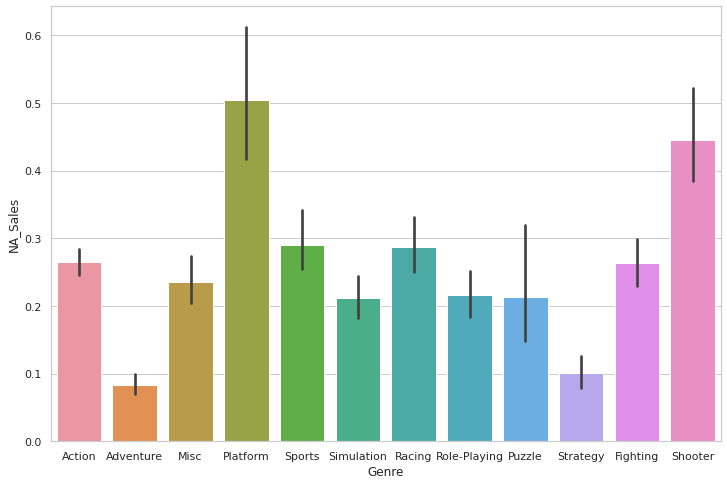

In [7]:
import seaborn as sns
from matplotlib import pyplot

sns.set_theme(style="whitegrid")

fig, ax = pyplot.subplots(figsize=(12, 8))

ax = sns.barplot(ax=ax, x="Genre", y="NA_Sales", data=df_location)

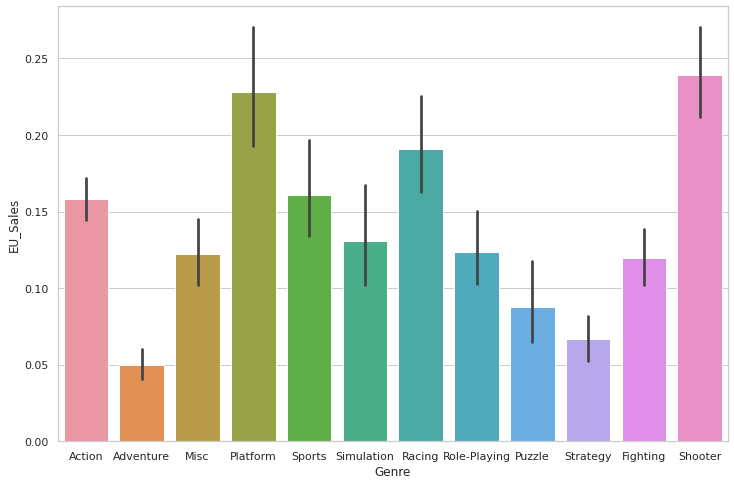

In [ ]:
fig2, ax2 = pyplot.subplots(figsize=(12, 8))

ax2 = sns.barplot(ax=ax2, x="Genre", y="EU_Sales", data=df_location)

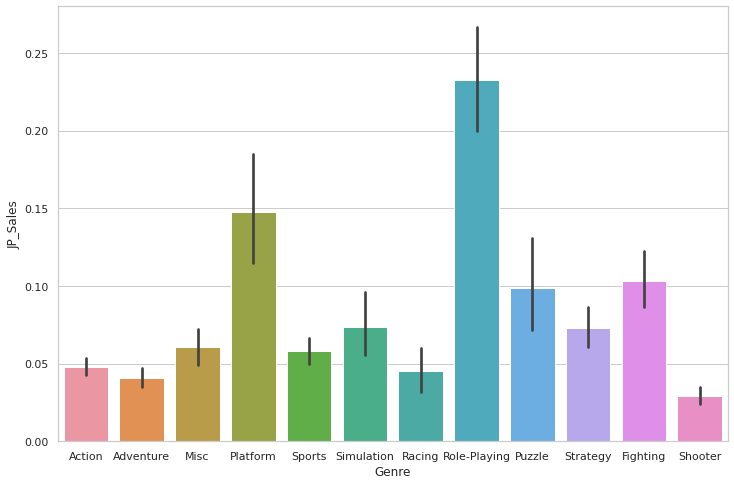

In [ ]:
fig3, ax3 = pyplot.subplots(figsize=(12, 8))

ax3 = sns.barplot(ax=ax3, x="Genre", y="JP_Sales", data=df_location)

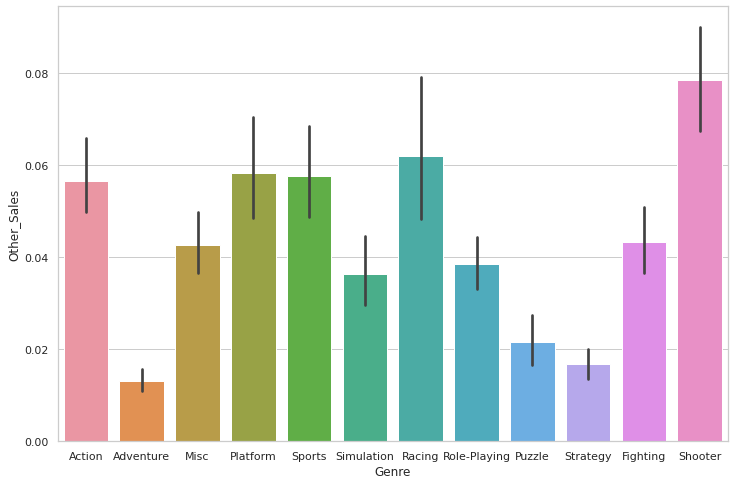

In [ ]:
fig4, ax4 = pyplot.subplots(figsize=(12, 8))

ax4 = sns.barplot(ax=ax4, x="Genre", y="Other_Sales", data=df_location)

In [8]:
genre_data = df_location.groupby("Genre").sum().sort_values(by=['NA_Sales'], ascending=False)
genre_data

# NA Sales (북미 판매량)이 제일 많기 때문에 그 기준으로 내림차순을 만들었을 때, Action, Sports, Shooter, Platform, Racing, Role-Playing (6가지) 게임종목들이 가장 인기있다는 걸 확인할 수 있었다.

,NA_Sales,EU_Sales,JP_Sales,Other_Sales
Genre,,,,
Action,874.81,522.16,157.90,186.45
Sports,680.52,376.48,135.37,134.67
Shooter,581.92,313.05,38.28,102.65
Platform,446.44,201.61,130.65,51.53
Misc,408.05,212.36,105.27,74.04
Racing,357.19,237.10,56.40,77.10
Role-Playing,319.54,183.58,344.95,56.96
Fighting,223.20,101.22,87.34,36.64
Simulation,182.96,113.35,63.70,31.48


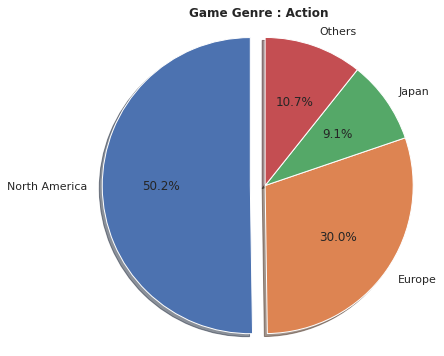

In [9]:
import matplotlib.pyplot as plt

labels = 'North America', 'Europe', 'Japan', 'Others'
sizes = [874.81,	522.16,	157.90,	186.45]
explode = (0.1, 0, 0, 0)

fig1, ax_pie1 = plt.subplots(figsize=(6, 6))
ax_pie1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax_pie1.axis('equal')
plt.title('Game Genre : Action', fontweight='bold')

plt.show()

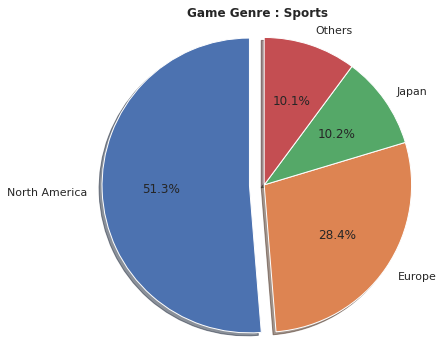

In [ ]:

sizes = [680.52,	376.48,	135.37,	134.67]
explode = (0.1, 0, 0, 0)

fig3, ax_pie3 = plt.subplots(figsize=(6,6))
ax_pie3.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax_pie3.axis('equal')
plt.title('Game Genre : Sports', fontweight='bold')

plt.show()

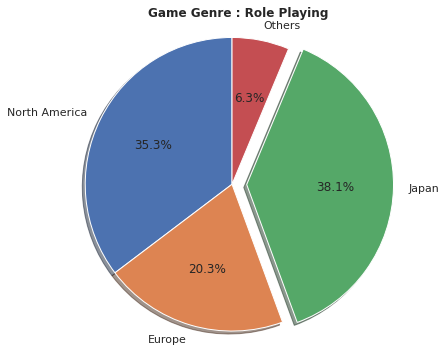

In [ ]:
sizes2 = [319.54,	183.58,	344.95,	56.96]
explode2 = (0, 0, 0.1, 0)

fig1, ax_pie2 = plt.subplots(figsize=(6,6))
ax_pie2.pie(sizes2, explode=explode2, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax_pie2.axis('equal')
plt.title('Game Genre : Role Playing', fontweight='bold')


plt.show()



> **북미(NA)와 유럽(EU)은 인기 게임종목 순위나 동향이 비슷하다는 걸 볼 수 있었다. 두 지역의 대표적인 선호 장르는 Action, Sport, Shooter, Platform, Racing이었으며 일본은 Role-Playing이 압도적인 1위를 차지했고, 그 다음 순위인 Platform이 공통적으로 세 지역에서 비슷한 비중으로 인기가 있었다.**



---

## 2. **연도별 게임 트렌드**



In [ ]:
df_chrono = df[['Platform', 'Year', 'Genre', 'Publisher', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']]
df_chrono['Sales'] = df_chrono['NA_Sales'] + df_chrono['EU_Sales'] + df_chrono['JP_Sales'] + df_chrono['Other_Sales'] 
df_chrono.drop(['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales'], axis=1, inplace=True)
df_chrono

,Platform,Year,Genre,Publisher,Sales
0,DS,2008.0,Action,Destineer,0.04
1,Wii,2009.0,Action,Namco Bandai Games,0.18
2,PSP,2010.0,Adventure,Alchemist,0.02
3,DS,2010.0,Misc,Zoo Games,0.04
4,PS3,2010.0,Platform,D3Publisher,0.25
...,...,...,...,...,...
16593,GC,2006.0,Platform,Vivendi Games,0.20
16594,PSP,2005.0,Action,Rising Star Games,0.01
16595,PS3,2015.0,Sports,Take-Two Interactive,0.79
16596,PSV,2013.0,Action,Tecmo Koei,0.38


In [ ]:
df_chrono.dropna(inplace=True)

In [ ]:
def toInt(flt):
  if flt:
    return int(flt)
  else:
    pass

In [ ]:
# change float value to int value
df_chrono['Year'] = df_chrono['Year'].apply(toInt)
df_chrono

,Platform,Year,Genre,Publisher,Sales
0,DS,2008,Action,Destineer,0.04
1,Wii,2009,Action,Namco Bandai Games,0.18
2,PSP,2010,Adventure,Alchemist,0.02
3,DS,2010,Misc,Zoo Games,0.04
4,PS3,2010,Platform,D3Publisher,0.25
...,...,...,...,...,...
16593,GC,2006,Platform,Vivendi Games,0.20
16594,PSP,2005,Action,Rising Star Games,0.01
16595,PS3,2015,Sports,Take-Two Interactive,0.79
16596,PSV,2013,Action,Tecmo Koei,0.38


In [ ]:
# one-hot encoding the 'Genre' using get_dummies
y = pd.get_dummies(df_chrono.Genre)
y[['Year', 'Sales']] = df_chrono[['Year', 'Sales']]

In [ ]:
column_values = ['Action', 'Adventure', 'Fighting', 'Misc', 'Platform', 'Puzzle', 'Racing', 'Role-Playing', 'Shooter', 'Simulation' , 'Sports', 'Strategy']

for i in column_values:
  y[i] = y[i]*y['Sales']

y
# multiply each one-hot-encoded value with the Sales value

,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy,Year,Sales
0,0.04,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.0,2008,0.04
1,0.18,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.0,2009,0.18
2,0.00,0.02,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.0,2010,0.02
3,0.00,0.00,0.00,0.04,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.0,2010,0.04
4,0.00,0.00,0.00,0.00,0.25,0.0,0.0,0.0,0.0,0.0,0.00,0.0,2010,0.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16593,0.00,0.00,0.00,0.00,0.20,0.0,0.0,0.0,0.0,0.0,0.00,0.0,2006,0.20
16594,0.01,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.0,2005,0.01
16595,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.79,0.0,2015,0.79
16596,0.38,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.0,2013,0.38


In [ ]:
y.drop(['Sales'], axis=1, inplace=True)
# sales column no longer needed

In [ ]:
# getting sum of different categories
# 최근 데이터는 자료 부족으로 일단 제외 (2018, 2020)
df_years = y.groupby("Year").sum()[:-2]
df_years.tail()

,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy
Year,,,,,,,,,,,,
2012,120.78,5.90,9.53,22.93,18.54,1.74,14.43,47.77,72.84,13.37,30.90,3.33
2013,125.21,6.61,7.23,25.66,25.09,1.00,13.02,30.54,62.73,8.68,41.54,6.32
2014,99.01,6.09,16.15,23.73,8.87,1.50,16.71,45.88,65.99,5.54,46.64,0.97
2015,68.25,8.01,7.78,11.66,6.05,0.69,7.92,36.43,66.12,5.61,41.49,1.82
2016,19.84,1.79,3.85,1.15,2.08,0.00,1.67,6.75,18.17,0.39,14.63,0.52


In [ ]:
# # stacked bar graph on different genre types, 카테고리가 너무 많아서 겹치는 색깔들이 있음
# df_years.diff(axis=1).fillna(df_years).astype(df_years.dtypes).plot.bar(stacked=True, figsize=(15,10))

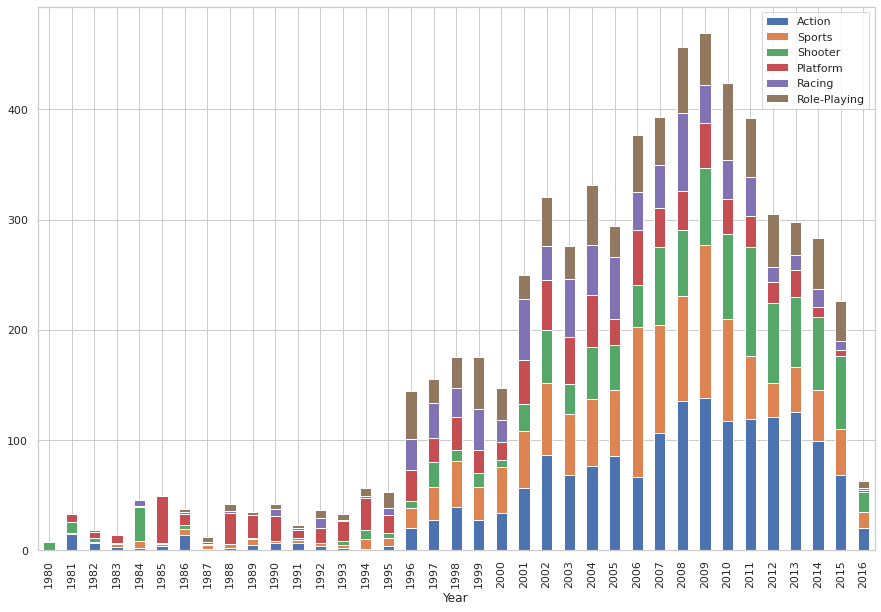

In [ ]:
# 잘 안 보이기 때문에 6가지 제일 인기있었던 종목들로 추려서 정리
df_years6 = df_years[['Action', 'Sports', 'Shooter', 'Platform', 'Racing', 'Role-Playing']]
df_years6.plot.bar(stacked=True, figsize=(15,10))

> **연도별 게임 장르의 동향을 봤을 때, 2009년까지는 스포츠(Sports) 게임의 선호도가 꽤 높았던 것을 볼 수 있다. 하지만 최근 5년 내의 동향을 보면 액션(Action) 게임과 사격(Shooter) 게임이 오히려 지속적인 관심으로 꾸준한 2-30% 비중을 차지하고 있다. 레이싱(Racing)이나 플랫폼(Platform) 기반 게임 종목들은 추세가 줄어들고 있고, 롤플레이(Role-Playing) 장르 같은 경우는 연도와 상관 없이 꾸준한 인기를 이어가고 있는 것으로 보인다.**

In [ ]:
# # same graph for publisher - not a very bright idea
# # publisher의 종류가 아주 많다는 것을 발견! 동향 파악에 도움 X
# y2 = pd.get_dummies(df_chrono.Publisher)
# y2['Year'] = df_chrono['Year']
# df_years2 = y2.groupby("Year").sum()[:-2]
# df_years2.diff(axis=1).fillna(df_years2).astype(df_years2.dtypes).plot.bar(stacked=True, figsize=(15,10))

In [ ]:
# # same graph for platform
# # 각 플렛폼의 다양한 버전이 다르게 표기되어 있기 때문에 통일하는 것이 필요!
# y3 = pd.get_dummies(df_chrono.Platform)
# y3['Year'] = df_chrono['Year']
# df_years_platform = y3.groupby("Year").sum()[:-2]
# df_years_platform.diff(axis=1).fillna(df_years_platform).astype(df_years_platform.dtypes).plot.bar(stacked=True, figsize=(18,10))

In [ ]:
# 플렛폼의 회사별 구분

y3 = pd.get_dummies(df_chrono.Platform)
y3['Year'] = df_chrono['Year']
df_years_platform = y3.groupby("Year").sum()[:-2]

df_years_platform['Nintendo'] = df_years_platform['Wii'] + df_years_platform['WiiU'] + df_years_platform['N64'] + df_years_platform['GC'] + df_years_platform['NES'] + df_years_platform['3DS'] + df_years_platform['DS'] + df_years_platform['GB'] + df_years_platform['GBA'] + df_years_platform['WS'] + df_years_platform['SNES']
df_years_platform.drop(['Wii', 'WiiU', 'N64', 'GC', 'NES', '3DS', 'DS', 'GB', 'GBA', 'WS', 'SNES'], axis=1, inplace=True)

df_years_platform['XBox'] = df_years_platform['X360'] + df_years_platform['XOne'] + df_years_platform['XB'] 
df_years_platform.drop(['XB', 'XOne', 'X360'], axis=1, inplace=True)

df_years_platform['PlayStation'] = df_years_platform['PS'] + df_years_platform['PS2'] + df_years_platform['PS3']  + df_years_platform['PS4'] + df_years_platform['PSP'] + df_years_platform['PSV']
df_years_platform.drop(['PS', 'PS2', 'PS3', 'PS4', 'PSP', 'PSV'], axis=1, inplace=True)

df_years_platform['Sega'] = df_years_platform['SAT'] + df_years_platform['SCD'] 
df_years_platform.drop(['SAT', 'SCD'], axis=1, inplace=True)

df_years_platform['Others'] = df_years_platform['2600'] + df_years_platform['3DO'] + df_years_platform['DC']  + df_years_platform['GEN'] + df_years_platform['GG'] + df_years_platform['NG'] + df_years_platform['TG16']
df_years_platform.drop(['2600', '3DO', 'DC', 'GEN', 'GG', 'NG', 'PCFX', 'TG16'], axis=1, inplace=True)


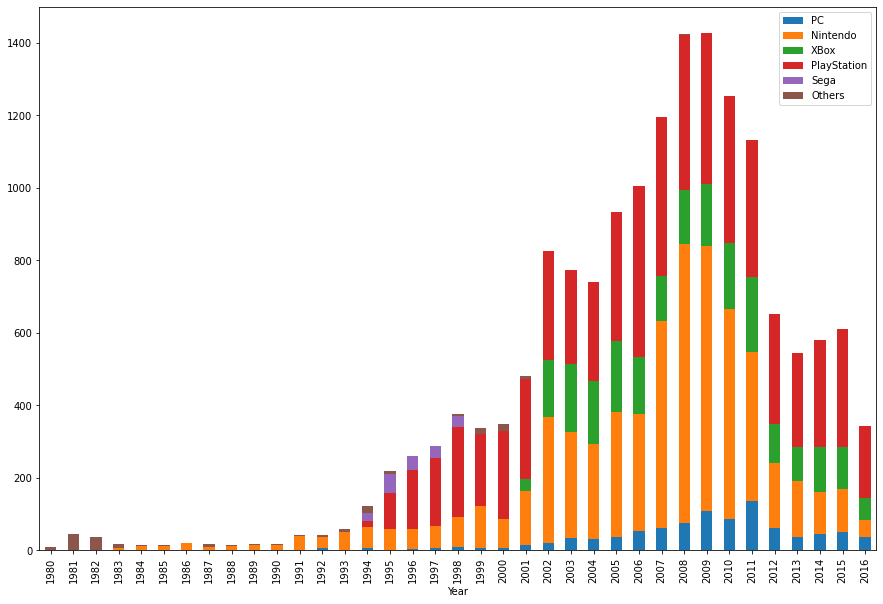

In [ ]:
df_years_platform.plot.bar(stacked=True, figsize=(15,10))

> **연도별 플랫폼들의 동향을 봤을 때, 2011년까지 거의 50-60%를 차지했던 Nintendo 플랫폼은 최근에 들어서 비교적 줄어들었고, 오히려 PlayStation의 판매율이 상당해졌다고 볼 수 있다. XBox와 PC 게임 또한 2000년대 이후로 꾸준한 인기를 이어가고 있는 것으로 보인다.**

---

## 3. **출고량이 높은 게임의 특징**

In [10]:
df_popular = df
df_popular['Total_Sales'] = df_popular['NA_Sales'] + df_popular['EU_Sales'] + df_popular['JP_Sales'] + df_popular['Other_Sales']


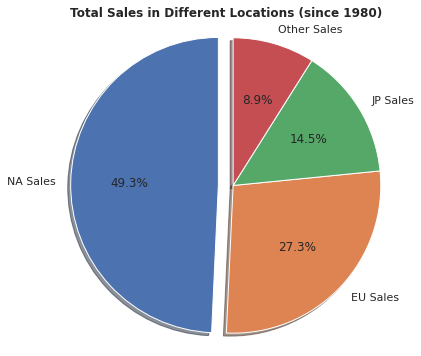

In [22]:
labels = 'NA Sales', 'EU Sales', 'JP Sales', 'Other Sales'
sizes = [df_popular['NA_Sales'].sum(),	df_popular['EU_Sales'].sum(),	df_popular['JP_Sales'].sum(),	df_popular['Other_Sales'].sum()]
explode = (0.1, 0, 0, 0)

fig1, ax_pie1 = plt.subplots(figsize=(6, 6))
ax_pie1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax_pie1.axis('equal')
plt.title('Total Sales in Different Locations (since 1980)', fontweight='bold')

plt.show()

In [11]:
# Top 10 most popular games based on total sales amount
df_popular50 = df_popular.sort_values(by = 'Total_Sales', ascending=False)[:50]
df_popular50.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
2908,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
4199,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
12579,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.83
3352,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
7829,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.38


In [ ]:
df_popular.dropna(inplace=True)
df_popular['Year'] = df_popular['Year'].apply(toInt)

In [ ]:
df_since2005 = df_popular[df_popular['Year'] > 2005]
# Top 50 most popular games based on total sales amount - (since 2005)
df_since2005 = df_since2005.sort_values(by = 'Total_Sales', ascending=False)[:50]
df_since2005.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
2908,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
12579,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.83
3352,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
6937,New Super Mario Bros.,DS,2006,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
3014,Wii Play,Wii,2006,Misc,Nintendo,14.03,9.20,2.93,2.85,29.01




> 2005년 이후의 데이터를 보면 Platform - Wii 가 매출액 상위 10위 게임 항목 중 7개가 해당하는 것을 발견할 수 있었다. 그렇다면 Wii Platform을 사용하면 무조건 매출액이 높은지, **Wii(Nintendo)의 평균 매출액은 다른 Platform의 매출액보다 높을까**라는 가설을 통계적으로 유의하게 증명해보고 싶었다.



> - H0 (귀무가설) : Wii(Nintendo)의 평균 매출액은 다른 Platform의 매출액보다 낮거나 같다.
> - HA (대립가설) : Wii의 평균 매출액은 다른 Platform의 매출액보다 높다.



> --> 위의 Platform 별로 나눈 데이터프레임(df_years_platform)을 한번 더 사용해서 Platform별로 매출액 리스트를 비교해보기로 했다.









In [ ]:
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

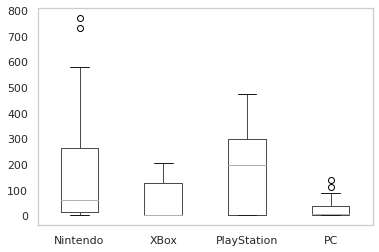

In [ ]:
data = {'Nintendo': df_years_platform['Nintendo'], 'XBox': df_years_platform['XBox'], 'PlayStation': df_years_platform['PlayStation'], 'PC': df_years_platform['PC']}
data = pd.DataFrame(data)
data_melt = pd.melt(data.reset_index(), value_vars=['Nintendo', 'XBox', 'PlayStation', 'PC'])
data_melt.columns = ['samples', 'value']

data.boxplot(grid = False);


In [ ]:
import scipy.stats as stats
fvalue, pvalue = stats.f_oneway(data['Nintendo'], data['XBox'], data['PlayStation'], data['PC'])
print(fvalue, pvalue)

10.737934405277947 2.0622290579586378e-06


In [ ]:
! pip install bioinfokit


     |████████████████████████████████| 82 kB 611 kB/s 
  Created wheel for bioinfokit: filename=bioinfokit-2.0.4-py3-none-any.whl size=56009 sha256=e2d5d639bc72d19d5d84ac0f1996c9a3d44bdac4aebe9486497545554f8abdc6
  Stored in directory: /root/.cache/pip/wheels/5d/f0/f9/3cfa74f39676f6745eeb99be64826173241a47808d2cb2f30f
  Created wheel for adjustText: filename=adjustText-0.7.3-py3-none-any.whl size=7095 sha256=2b428a7cbb9210293530626357f4846f74a0d0aa92ad40abbcdb30232e07ef4c
  Stored in directory: /root/.cache/pip/wheels/2f/98/32/afbf902d8f040fadfdf0a44357e4ab750afe165d873bf5893d
Successfully built bioinfokit adjustText


In [ ]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

from bioinfokit.analys import stat
res = stat()
res.anova_stat(df=data_melt, res_var='value', anova_model='value ~ C(samples)')
res.anova_summary


,df,sum_sq,mean_sq,F,PR(>F)
C(samples),3.0,6.339985e+05,211332.835586,10.737934,0.000002
Residual,144.0,2.834058e+06,19680.957958,NaN,NaN




> p value가 0.5보다 한참 작게 나오므로 귀무가설을 기각하고 대립가설을 채택하게 되어 - **네 가지 Platform의 판매량의 평균은 동일하지 않다고 볼 수 있다**. 다만 Nintendo의 평균이 확연히 높은지는 위의 boxplot을 봤을 때 확실치 않다. 높은 수치를 가진 outlier가 많기 때문에 Nintendo와 Playstation을 비교해보는 two-sample one-tailed test를 진행하였다.





> Two-sample One-tailed test를 위한 가설 : **평균 Nintendo 판매량이 평균 PlayStation 판매량보다 크다**






In [ ]:
!pip install scipy --upgrade

     |████████████████████████████████| 28.5 MB 26 kB/s 
  Attempting uninstall: scipy
    Found existing installation: scipy 1.4.1
    Uninstalling scipy-1.4.1:
      Successfully uninstalled scipy-1.4.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


In [ ]:
import scipy.stats as stats

stats4, pv4 = stats.ttest_ind(df_years_platform['Nintendo'], df_years_platform['PlayStation'], alternative='greater')
stats5, pv5 = stats.ttest_ind(df_years_platform['Nintendo'], df_years_platform['PlayStation'], alternative='less')

In [ ]:
pv4, pv5

(0.5990775995222363, 0.4009224004777637)

In [ ]:
alpha = 0.05

if pv4 < alpha:
    print('Nintendo sales mean is higher')
elif pv5 < alpha:
    print('PlayStation sales mean is higher')
else:
    print('Cannot determine significant difference')


Cannot determine significant difference




> One tailed test를 통해 두 샘플을 비교했을 때, Nintendo 또는 PlayStation의 평균이 어느 하나보다 크다는 것을 유의미하게 확인하지 못했다. 양쪽 테스트 모두 p value가 0.1보다 크게 나왔기 때문에 위 **인기게임 순위에서 나왔던 Wii 항목들은 outlier였던 것으로 판단이 된다**.




In [20]:
df_since2010 = df_popular[df_popular['Year'] > 2010]
# Top 50 most popular games based on total sales amount - with recent data (since 2010)
df_since2010 = df_since2010.sort_values(by = 'Total_Sales', ascending=False)[:50]
df_since2010.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
3483,Grand Theft Auto V,PS3,2013.0,Action,Take-Two Interactive,7.01,9.27,0.97,4.14,21.39
10913,Grand Theft Auto V,X360,2013.0,Action,Take-Two Interactive,9.63,5.31,0.06,1.38,16.38
2809,Call of Duty: Modern Warfare 3,X360,2011.0,Shooter,Activision,9.03,4.28,0.13,1.32,14.76
1971,Pokemon X/Pokemon Y,3DS,2013.0,NaN,Nintendo,5.17,4.05,4.34,0.79,14.35
9070,Call of Duty: Black Ops 3,PS4,2015.0,Shooter,Activision,5.77,5.81,0.35,2.31,14.24



> **최신 데이터(2010 이후)의 인기 게임 순위들을 정리했을 때, 오히려 PlayStation과 XBox 플랫폼의 게임들이 많은 것을 볼 수 있다** - 앞으로 게임을 새롭게 개발해야 한다면 플랫폼으로 PlayStation을 선택하는 게 바람직하다.


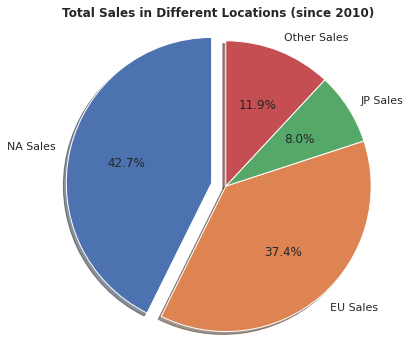

In [21]:
labels = 'NA Sales', 'EU Sales', 'JP Sales', 'Other Sales'
sizes = [df_since2010['NA_Sales'].sum(),	df_since2010['EU_Sales'].sum(),	df_since2010['JP_Sales'].sum(),	df_since2010['Other_Sales'].sum()]
explode = (0.1, 0, 0, 0)

fig1, ax_pie1 = plt.subplots(figsize=(6, 6))
ax_pie1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax_pie1.axis('equal')
plt.title('Total Sales in Different Locations (since 2010)', fontweight='bold')

plt.show()



> 새로운 방향으로 데이터를 보기 위해서 **기존의 데이터(df)로 PCA를 통해 Cluster Analysis**를 해보았다.



In [ ]:
df_pca = df.drop(['Name', 'Publisher'], axis=1)

In [ ]:
genre = df_pca['Genre']
platform = df_pca['Platform']

df_pca.drop(['Genre', 'Platform'], axis=1, inplace=True)
df_pca

,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,2008.0,0.04,0.00,0.00,0.00
1,2009.0,0.17,0.00,0.00,0.01
2,2010.0,0.00,0.00,0.02,0.00
3,2010.0,0.04,0.00,0.00,0.00
4,2010.0,0.12,0.09,0.00,0.04
...,...,...,...,...,...
16593,2006.0,0.15,0.04,0.00,0.01
16594,2005.0,0.01,0.00,0.00,0.00
16595,2015.0,0.44,0.19,0.03,0.13
16596,2013.0,0.05,0.05,0.25,0.03


In [ ]:
df_pca['Year'] = df_pca['Year'].apply(toInt)

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
features = pd.DataFrame(scaler.fit_transform(df_pca), columns=df_pca.columns)

In [ ]:
df_pca.dropna(inplace=True)

In [ ]:
import numpy as np
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
extracted_df = pd.DataFrame(pca.fit_transform(features), columns=['PC1', 'PC2'])
# extracted_df['genre'] = genre
extracted_df['platform'] = platform


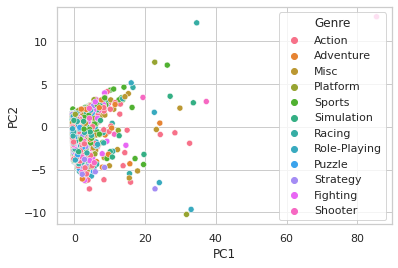

In [ ]:
sns.scatterplot(data=extracted_df, x='PC1', y='PC2', hue=genre)

**pretty graph :>**